<a href="https://colab.research.google.com/github/mmouadd/GdKI/blob/main/Aufgabe_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install tf-nightly

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import  models
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [4]:
import pathlib
path_dataset_drive = "/content/drive/MyDrive/KI Projekt - Dataset/Dataset-1 - Cropped" 
dataset_dir = pathlib.Path(path_dataset_drive)

In [5]:
batch_size = 128
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 17322 files belonging to 30 classes.
Using 13858 files for training.
Found 17322 files belonging to 30 classes.
Using 3464 files for validation.


In [7]:
class_dataset = train_ds.class_names
print(class_dataset)

['Angela Merkel', 'Angelina Jolie', 'Bill Gates', 'Boris Johnson', 'Conor Mcgregor', 'Cristiano Ronaldo', 'Donald Trump', 'Dwayne Johnson', 'Elon Musk', 'Emma Watson', 'Emmanuel Macron', 'Eva Mendes', 'Jeff Bezos', 'Jennifer Lopez', 'Justin Trudeau', 'Lebron James', 'Leonardo Dicaprio', 'Lewis Hamilton', 'Lionel Messi', 'Mark Zuckerberg', 'Max Verstappen', 'Minka Kelly', 'Neymar Jr', 'Olaf Scholz', 'Rafael Nadal', 'Roger Federer', 'Shakira', 'Tiger Woods', 'Tom Cruise', 'Vladimir Putin']


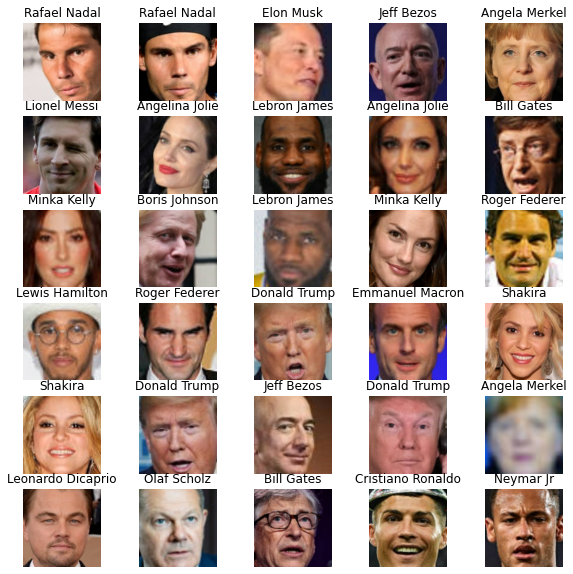

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(30):
          ax = plt.subplot(6, 5, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_dataset[labels[i]])
          plt.axis("off")

In [9]:
normalization_layer =layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

5.0834933e-05 1.0


In [10]:
num_classes = 30
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [11]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [12]:
history = model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
109/109 [==============================] - 2834s 26s/step - loss: 1.8215 - accuracy: 0.4990 - val_loss: 0.7936 - val_accuracy: 0.7872
Epoch 2/50
109/109 [==============================] - 481s 4s/step - loss: 0.4943 - accuracy: 0.8716 - val_loss: 0.5541 - val_accuracy: 0.8482
Epoch 3/50
109/109 [==============================] - 482s 4s/step - loss: 0.2306 - accuracy: 0.9404 - val_loss: 0.3619 - val_accuracy: 0.9044
Epoch 4/50
109/109 [==============================] - 488s 4s/step - loss: 0.1081 - accuracy: 0.9732 - val_loss: 0.3462 - val_accuracy: 0.9235
Epoch 5/50
109/109 [==============================] - 480s 4s/step - loss: 0.0661 - accuracy: 0.9826 - val_loss: 0.3359 - val_accuracy: 0.9264
Epoch 6/50
109/109 [==============================] - 482s 4s/step - loss: 0.0323 - accuracy: 0.9922 - val_loss: 0.3501 - val_accuracy: 0.9293
Epoch 7/50
109/109 [==============================] - 483s 4s/step - loss: 0.0242 - accuracy: 0.9944 - val_loss: 0.3647 - val_accuracy: 0.92

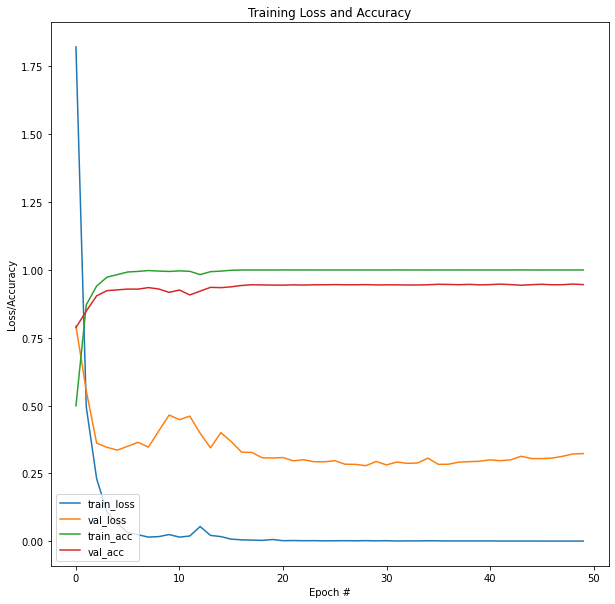

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)
plt.figure(figsize=(10, 10))
epochs = 50
N = epochs
plt.plot(np.arange(0,N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc='lower left')
plt.show()

In [47]:
import cv2 #opencv itself

import numpy as np # matrix manipulations

1/1 [==============================] - 0s 36ms/step
predection is for Olaf Scholz with a 100.00percent confidence.


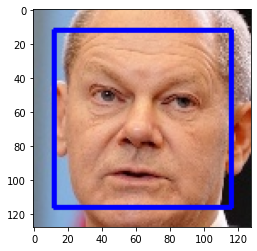

In [67]:
path="/content/drive/MyDrive/KI Projekt - Dataset/000.jpg"
base_image = cv2.imread(path)
img=keras.preprocessing.image.load_img(
    path,target_size=(img_height,img_width)
)
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)
predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(base_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
print("predection is for {} with a {:.2f}percent confidence.".format(class_dataset[np.argmax(score)],100*np.max(score)))